In [123]:
 # to hide TMDB API keys
import pandas as pandas
import requests # to make TMDB API calls
import locale # to format currency as USD
locale.setlocale( locale.LC_ALL, '' )
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

api_key= '87983fbe976988a9e22330ebf030a1ae'


In [124]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&sort_by=revenue.desc&with_genre=28')

In [125]:
highest_revenue = response.json() # store parsed json response

# uncomment the next line to get a peek at the highest_revenue json structure
# highest_revenue

highest_revenue_films = highest_revenue['results']

In [199]:
# define column names for our new dataframe
columns = ['film', 'revenue']

# create dataframe with film and revenue columns
df = pandas.DataFrame(columns=columns)

In [200]:
def getDirectors():
    directorList = []
    for film in highest_revenue_films:
        movieDetails = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'/credits?api_key='+ api_key+'&language=en-US&sort_by=revenue.desc&with_genre=28')
        movieDetails = movieDetails.json()
        for i in movieDetails['crew']:
            if i['job'] == 'Director':
                directorList.append(i['name'])
    return directorList

In [188]:
directors = getDirectors()
print(directors)

['Jude Walker', 'James Cameron', 'Anthony Russo', 'Joe Russo', 'James Cameron', 'J.J. Abrams', 'Anthony Russo', 'Joe Russo', 'Jon Watts', 'Colin Trevorrow', 'Jon Favreau', 'Joss Whedon', 'James Wan', 'Barry Markle', 'Joseph Kosinski', 'Chris Buck', 'Jennifer Lee', 'Joss Whedon', 'Ryan Coogler', 'David Yates', 'Rian Johnson', 'J. A. Bayona', 'Chris Buck', 'Jennifer Lee']


In [201]:
def leadActor():
    actorList = []
    for film in highest_revenue_films:
        movieDetails = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'/credits?api_key='+ api_key+'&language=en-US&sort_by=revenue.desc&with_genre=28')
        movieDetails = movieDetails.json()
        for i in movieDetails['crew']:
            if i['known_for_department'] == 'Acting':
                actorList.append(i['name'])
    return actorList

In [196]:
actors = leadActor()
print(actors)

['Dwayne Johnson', 'Woody Schultz', 'Ilram Choi', 'Simone Bargetze', 'Mark Ginther', 'Terry Notary', 'Reuben Langdon', 'Christopher Ivins', 'Luke Hawker', 'Alicia Vela-Bailey', 'Nickolas Stevens', 'Steve Upton', 'Laurel Devenie', 'Stuart Thorp', 'Nito Larioza', 'James Willingham III', 'Stella Angelova', 'Min Windle', 'Rodney Cook', 'Peter Lyon', 'Atanas Atanasov', 'Francis Biggs', 'Daniel Falconer', 'Greg Tozer', 'Jon Favreau', 'Zelda Tinska', 'Terry Notary', 'Terry Notary', 'Jimmy Ray Pickens', 'Mike Lutz', 'Lloyd Pitts', 'Anna Majewski', 'Anna Majewski', 'Mark Fisher', 'Nate Andrade', 'Akihiro Haga', 'Paul Chandler', 'Jackson Spidell', 'Lisa Walsh', 'Maria Hippolyte', 'Steven Brown', 'Harrison Osterfield', 'Juan Alonso', 'Céline Dion', 'Simon Pegg', 'Tom Reynolds', 'Jasmin Moradian', 'Adam J. Bernard', 'Jon Favreau', 'Alexander St. Pierre', 'Mike Lutz', 'Natapon Huangsakuncharoen', 'Jeff Comfort', 'Riki LeCotey', 'Dean Labossiere', 'Jackson Spidell', 'Hans Georg Struhar', 'Sarah Stau

In [210]:

for film in highest_revenue_films:
    #print(film['title']    
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US&sort_by=revenue.desc&with_genre=28')
    film_revenue = film_revenue.json()
    movieDetails = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'/credits?api_key='+ api_key+'&language=en-US')
    movieDetails = movieDetails.json()
    directors = movieDetails['crew']
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'], film_revenue['revenue']] # store title and revenue in our dataframe    

In [212]:
df.head(10)

,film,revenue
1,Avatar,2920357254
2,Avengers: Endgame,2797800564
3,Titanic,2187463944
4,Star Wars: The Force Awakens,2068223624
5,Avengers: Infinity War,2046239637
6,Spider-Man: No Way Home,1916050941
7,Jurassic World,1671713208
8,The Lion King,1667635327
9,The Avengers,1518815515
10,Furious 7,1515047671


In [208]:
rev = df['revenue']
tit = df['film']

<AxesSubplot:xlabel='revenue', ylabel='film'>

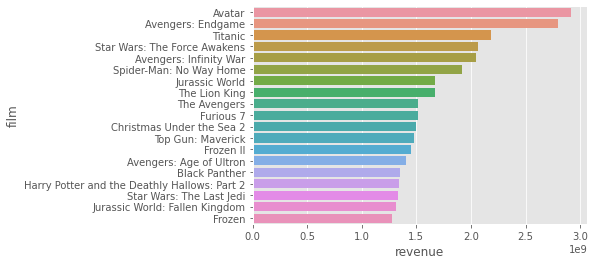

In [209]:
sns.barplot(x = rev, y = tit, data = df)